# **Model Inference**

## Import Libraries

In [21]:
# Importing libraries
import pickle
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt

## Load Model

In [22]:
# load the model 
with open('SVMModel.pkl', 'rb') as file1:
  SVMModel = pickle.load(file1)

with open('Scaling.pkl', 'rb') as file1:
  scaler = pickle.load(file1)

In [23]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/andik-alfauzi/Final-Project/main/sample_dataset_timeseries_noarea.csv')

# Change into datetime
data['week_end_date'] = pd.to_datetime(data['week_end_date'], format='%Y-%m-%d')

# Create a dataframe
sales = data.groupby('week_end_date')['quantity'].sum()

In [24]:
sales

week_end_date
2022-01-02     128808
2022-01-09    3839557
2022-01-16    4138934
2022-01-23    4149077
2022-01-30    4824273
               ...   
2023-03-12    4775638
2023-03-19    4787111
2023-03-26    4757590
2023-04-02    6001166
2023-04-09    4172070
Name: quantity, Length: 67, dtype: int64

In [25]:
# Create A New Dataset with `window=4`
window = 4
X = []
y = []

for index in range(0, len(sales)-window):
  X.append(sales[index : window + index])
  y.append(sales[window + index])

X = np.array(X)
y = np.array(y)

In [26]:
# Scaling using MinMaxScaler
# salesScaled = scaler.fit_transform(X)

## Model Inference

In [27]:
# Define function forcasting
def forecasting(week):
    sales_forecast = sales.copy()
    window = 4
    for i in range(week):
        X = np.array(sales_forecast[-window:].values).reshape(1, -1)
        X_scaled = scaler.transform(X)

        # add  7 last day into dataset
        last_date = sales_forecast.index[-1]
        new_date = last_date + pd.Timedelta(days=7)

        # make sure the date are valid
        while True:
            _, last_day = calendar.monthrange(new_date.year, new_date.month)
            if new_date.day <= last_day:
                break
            new_date -= pd.Timedelta(days=1)

        sales_forecast[new_date] = round(SVMModel.predict(X_scaled)[0])

    return sales_forecast

In [28]:
# Forecasting sales for the Next 4 weeks
sales_forecast = forecasting(4)

# Display forecast
sales_forecast

week_end_date
2022-01-02     128808
2022-01-09    3839557
2022-01-16    4138934
2022-01-23    4149077
2022-01-30    4824273
               ...   
2023-04-09    4172070
2023-04-16    4838422
2023-04-23    4696809
2023-04-30    4838735
2023-05-07    4707823
Name: quantity, Length: 71, dtype: int64

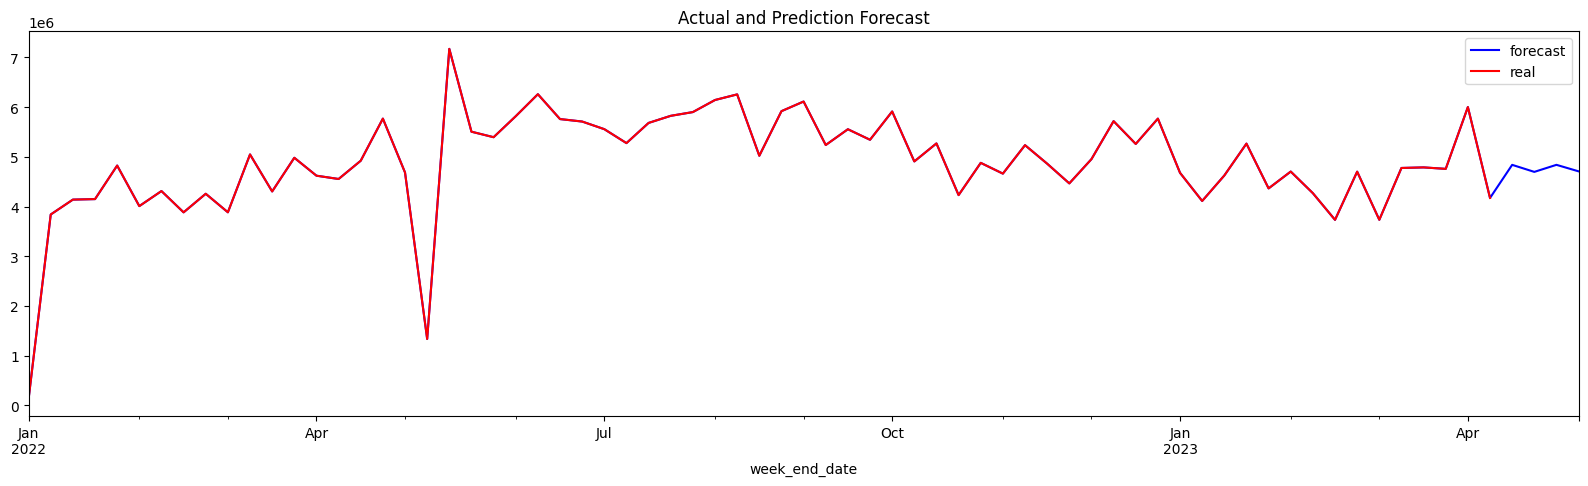

In [29]:
# Displaying forecast
sales_forecast.plot(color='blue',label='forecast',figsize=(20,5))
sales.plot(color='red',label='real')
plt.title('Actual and Prediction Forecast')
plt.legend()

In [30]:
# Displaying data forecast only
sales_forecast.tail(4)

week_end_date
2023-04-16    4838422
2023-04-23    4696809
2023-04-30    4838735
2023-05-07    4707823
Name: quantity, dtype: int64

# **Kesimpulan**

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Dari modeling sales forecasting diatas dapat disimpulkan :

1. Model terbaik yang dipilih adalah **Support Vector Regression** karena menghasilkan nilai `mean_absolute_error` senilai **505885.36** dan didukung `root_mean_squared_error` senilai **649890.24**.
2. Dari hasil prediksi dengan menggunakan **Support Vector Regression** maka dari sisi perusahaan dapat mengantisipasi kesalahan prediksi lebih dan kurang sebanyak **505885.36** dari target yang telah ditentukan sebelumnya.
3. Jika nilai prediksi lebih dari aktual, maka untuk target pada pekan selanjutnya sebaiknya dikurangi demi menghindari menumpuknya `product_item` yang belum terjual
4. Jika nilai prediksinya kurang dari aktual, maka sebaiknya perusahaan mengantisipasi dengan menyiapkan produk lebih banyak. 
5. Untuk further improvement, mungkin bisa menggunakan tuning model agar didapatkan nilai `mean_absolute_error` dan `root_mean_squared_error` yang lebih rendah demi menghindari kelebihan stock jika prediksi lebih dari aktual dan kekurangan stok jika ternyata prediksi dibawah dari aktual
6. Objective dari pengenalan diawal sudah berhasil dicapai dengan menampilkan 4 pekan selanjutnya setelah tanggal 2023-04-09, yaitu data di tanggal 2023-04-16 sebanyak **4838422**, 2023-04-23 sebanyak **4696809**, 2023-04-30 sebanyak **4838735** dan 2023-05-07 sebanyak **4707823**